In [24]:
# load all imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import datetime

In [3]:
from flaml import AutoML

In [4]:
# data source https://www.kaggle.com/rtatman/188-million-us-wildfires
data = pd.read_csv('fires.csv')

/Users/eeshasrivatsavaya/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head()

,1,1.1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest.1,...,A,40.03694444,-121.00583333,5,USFS,CA,63,063,Plumas,Unnamed: 38
0,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5,USFS,CA,61.0,61.0,Placer,NaN
1,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,NaN
2,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5,USFS,CA,3.0,3.0,Alpine,NaN
3,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5,USFS,CA,3.0,3.0,Alpine,NaN
4,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.635278,-120.103611,5,USFS,CA,5.0,5.0,Amador,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880464 entries, 0 to 1880463
Data columns (total 39 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   1                         int64  
 1   1.1                       int64  
 2   FS-1418826                object 
 3   FED                       object 
 4   FS-FIRESTAT               object 
 5   FS                        object 
 6   USCAPNF                   object 
 7   Plumas National Forest    object 
 8   0511                      object 
 9   Plumas National Forest.1  object 
 10  1.2                       object 
 11  PNF-47                    object 
 12  BJ8K                      object 
 13  FOUNTAIN                  object 
 14  Unnamed: 14               object 
 15  Unnamed: 15               object 
 16  Unnamed: 16               object 
 17  Unnamed: 17               object 
 18  Unnamed: 18               object 
 19  2005                      int64  
 20  2453403.5               

In [7]:
data.describe()

,1,1.1,2005,2453403.5,33,1300,9,2453403.5.1,33.1,1730,0.1,40.03694444,-121.00583333,5,063,Unnamed: 38
count,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,997826.000000,1.880464e+06,9.889330e+05,988933.000000,907911.000000,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,1.202316e+06,0.0
mean,9.402335e+05,5.484023e+07,2.003710e+03,2.453064e+06,1.647192e+02,1453.014479,5.979035e+00,2.453238e+06,172.656907,1534.831865,7.452020e+01,3.678121e+01,-9.570493e+01,1.059658e+01,9.578353e+01,NaN
std,5.428433e+05,1.011963e+08,6.663100e+00,2.434574e+03,9.003888e+01,405.961137,3.483860e+00,2.687549e+03,84.320273,432.737884,2.497599e+03,6.139032e+00,1.671694e+01,4.404661e+00,9.861509e+01,NaN
min,2.000000e+00,2.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,0.000000,1.000000e+00,2.448622e+06,1.000000,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00,1.000000e+00,NaN
25%,4.701178e+05,5.055008e+05,1.998000e+03,2.451084e+06,8.900000e+01,1240.000000,3.000000e+00,2.450700e+06,102.000000,1310.000000,1.000000e-01,3.281860e+01,-1.103632e+02,8.000000e+00,2.900000e+01,NaN
50%,9.402335e+05,1.067762e+06,2.004000e+03,2.453178e+06,1.640000e+02,1457.000000,5.000000e+00,2.453466e+06,181.000000,1600.000000,1.000000e+00,3.545250e+01,-9.204293e+01,1.400000e+01,6.700000e+01,NaN
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,1708.000000,9.000000e+00,2.455754e+06,232.000000,1810.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01,1.210000e+02,NaN
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,2359.000000,1.300000e+01,2.457392e+06,366.000000,2359.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01,8.100000e+02,NaN


In [8]:
data.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [9]:
print(data.columns)

Index(['1', '1.1', 'FS-1418826', 'FED', 'FS-FIRESTAT', 'FS', 'USCAPNF',
       'Plumas National Forest', '0511', 'Plumas National Forest.1', '1.2',
       'PNF-47', 'BJ8K', 'FOUNTAIN', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', '2005', '2453403.5', '33',
       '1300', '9', 'Miscellaneous', '2453403.5.1', '33.1', '1730', '0.1', 'A',
       '40.03694444', '-121.00583333', '5', 'USFS', 'CA', '63', '063',
       'Plumas', 'Unnamed: 38'],
      dtype='object')


In [10]:
data = data.drop(columns=["1", "1.1"])

In [11]:
data.columns = ["FOD_ID", "FPA_ID", "SOURCESYSTEMTYPE", "SOURCESYSTEM", "NWCGREPORTINGAGENCY", "NWCGREPORTINGUNIT_ID", "SOURCEREPORTINGUNIT_NAME", "LOCALFIREREPORT_ID", "LOCALINCIDENTID", "FIRE_CODE", "FIRE_NAME", "ICS209INCIDENT_NUMBER", "ICS209NAME", "MTBS_ID", "MTBSFIRENAME", "COMPLEX_NAME", "EMPTY", "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME", "STATCAUSECODE", "STATCAUSEDESCR", "CONT_DATE", "CONT_DOY", "CONT_TIME", "FIRE_SIZE", "FIRESIZECLASS", "LATITUDE", "LONGITUDE", "OWNER_CODE", "OWNER_DESCR", "STATE", "DELETE!","DELETE", "DELETE2", "DELETE3"]

In [12]:
data = data.drop(columns=["DELETE!", "DELETE", "DELETE2", "DELETE3"])

In [13]:
data.head()

,FOD_ID,FPA_ID,SOURCESYSTEMTYPE,SOURCESYSTEM,NWCGREPORTINGAGENCY,NWCGREPORTINGUNIT_ID,SOURCEREPORTINGUNIT_NAME,LOCALFIREREPORT_ID,LOCALINCIDENTID,FIRE_CODE,...,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRESIZECLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,...,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5,USFS,CA
1,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,...,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA
2,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,...,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5,USFS,CA
3,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,...,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5,USFS,CA
4,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,54,8,...,2453187.5,183.0,1600.0,0.10,A,38.635278,-120.103611,5,USFS,CA


In [14]:
print(data.columns)

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'LOCALINCIDENTID',
       'FIRE_CODE', 'FIRE_NAME', 'ICS209INCIDENT_NUMBER', 'ICS209NAME',
       'MTBS_ID', 'MTBSFIRENAME', 'COMPLEX_NAME', 'EMPTY', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE'],
      dtype='object')


<AxesSubplot:xlabel='FIRE_YEAR', ylabel='Count'>

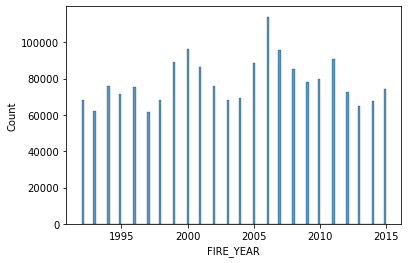

In [15]:
sns.histplot(data["FIRE_YEAR"])

<AxesSubplot:xlabel='DISCOVERY_DOY', ylabel='Count'>

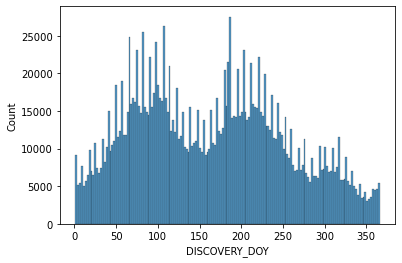

In [16]:
sns.histplot(data["DISCOVERY_DOY"])

/Users/eeshasrivatsavaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STATE', ylabel='count'>

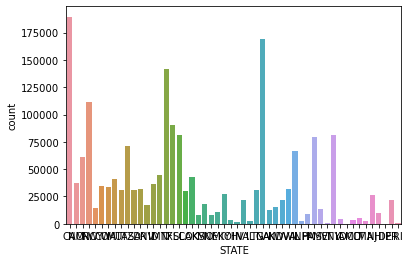

In [17]:
sns.countplot(data["STATE"])

In [18]:
data.isna().sum()


FOD_ID                            0
FPA_ID                            0
SOURCESYSTEMTYPE                  0
SOURCESYSTEM                      0
NWCGREPORTINGAGENCY               0
NWCGREPORTINGUNIT_ID              0
SOURCEREPORTINGUNIT_NAME          0
LOCALFIREREPORT_ID                0
LOCALINCIDENTID             1459286
FIRE_CODE                    820821
FIRE_NAME                   1555741
ICS209INCIDENT_NUMBER        960479
ICS209NAME                  1854747
MTBS_ID                     1854747
MTBSFIRENAME                1869461
COMPLEX_NAME                1869461
EMPTY                       1875281
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
DISCOVERY_TIME               882638
STATCAUSECODE                     0
STATCAUSEDESCR                    0
CONT_DATE                    891531
CONT_DOY                     891531
CONT_TIME                    972553
FIRE_SIZE                         0
FIRESIZECLASS               

In [19]:
data = data.drop(columns=["EMPTY","LOCALINCIDENTID", "FIRE_CODE","FIRE_NAME","ICS209INCIDENT_NUMBER", "ICS209NAME", "MTBS_ID","MTBSFIRENAME","COMPLEX_NAME", "CONT_DATE", "CONT_DOY", "CONT_TIME"])

In [20]:
print(data.columns)

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE'],
      dtype='object')


In [21]:
data.dtypes

FOD_ID                       object
FPA_ID                       object
SOURCESYSTEMTYPE             object
SOURCESYSTEM                 object
NWCGREPORTINGAGENCY          object
NWCGREPORTINGUNIT_ID         object
SOURCEREPORTINGUNIT_NAME     object
LOCALFIREREPORT_ID           object
FIRE_YEAR                     int64
DISCOVERY_DATE              float64
DISCOVERY_DOY                 int64
DISCOVERY_TIME              float64
STATCAUSECODE                 int64
STATCAUSEDESCR               object
FIRE_SIZE                   float64
FIRESIZECLASS                object
LATITUDE                    float64
LONGITUDE                   float64
OWNER_CODE                    int64
OWNER_DESCR                  object
STATE                        object
dtype: object

In [22]:
data["DISCOVERY_TIME"]

0           845.0
1          1921.0
2          1600.0
3          1600.0
4          1800.0
            ...  
1880459    1726.0
1880460     126.0
1880461    2052.0
1880462    2309.0
1880463    2128.0
Name: DISCOVERY_TIME, Length: 1880464, dtype: float64

<AxesSubplot:xlabel='DISCOVERY_TIME', ylabel='Count'>

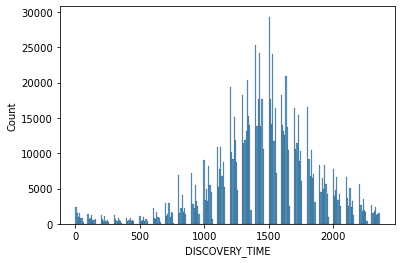

In [23]:
sns.histplot(data["DISCOVERY_TIME"])

In [27]:
data["DISCOVERY_DOY"]

0          133
1          152
2          180
3          180
4          182
          ... 
1880459    269
1880460    278
1880461    122
1880462    287
1880463     73
Name: DISCOVERY_DOY, Length: 1880464, dtype: int64

In [28]:
data["DISCOVERY_DATE"]

0          2453137.5
1          2453156.5
2          2453184.5
3          2453184.5
4          2453186.5
             ...    
1880459    2457291.5
1880460    2457300.5
1880461    2457144.5
1880462    2457309.5
1880463    2457095.5
Name: DISCOVERY_DATE, Length: 1880464, dtype: float64

In [29]:
data["FIRE_YEAR"]

0          2004
1          2004
2          2004
3          2004
4          2004
           ... 
1880459    2015
1880460    2015
1880461    2015
1880462    2015
1880463    2015
Name: FIRE_YEAR, Length: 1880464, dtype: int64

In [32]:
data["Julian_Date"] = data["FIRE_YEAR"].astype(str) + data["DISCOVERY_DOY"].astype(str)
data["Julian_Date"]

0          2004133
1          2004152
2          2004180
3          2004180
4          2004182
            ...   
1880459    2015269
1880460    2015278
1880461    2015122
1880462    2015287
1880463     201573
Name: Julian_Date, Length: 1880464, dtype: object

In [36]:
# code from: https://rafatieppo.github.io/post/2018_12_01_juliandate/ 
def julian_date_converter(julian_date):
    date_format = '%Y%j'
    converted_date = datetime.datetime.strptime(julian_date, date_format).date()
    return converted_date

In [38]:
data['Converted_Date'] = data['Julian_Date'].map(lambda x: julian_date_converter(x))
data['Converted_Date'] 

0          2004-05-12
1          2004-05-31
2          2004-06-28
3          2004-06-28
4          2004-06-30
              ...    
1880459    2015-09-26
1880460    2015-10-05
1880461    2015-05-02
1880462    2015-10-14
1880463    2015-03-14
Name: Converted_Date, Length: 1880464, dtype: object

In [41]:
data["DISOVERY_MONTH"] = data['Julian_Date'].map(lambda x: julian_date_converter(x).month)
data["DISOVERY_DAY"] = data['Julian_Date'].map(lambda x: julian_date_converter(x).day)

In [42]:
data["DISOVERY_MONTH"]

0           5
1           5
2           6
3           6
4           6
           ..
1880459     9
1880460    10
1880461     5
1880462    10
1880463     3
Name: DISOVERY_MONTH, Length: 1880464, dtype: int64

In [43]:
data["DISOVERY_DAY"]

0          12
1          31
2          28
3          28
4          30
           ..
1880459    26
1880460     5
1880461     2
1880462    14
1880463    14
Name: DISOVERY_DAY, Length: 1880464, dtype: int64

In [44]:
data.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Julian_Date', 'Converted_Date',
       'DISOVERY_MONTH', 'DISOVERY_DAY'],
      dtype='object')

# FLAML

In [22]:
#split into train and test
train = data[data['FIRE_YEAR'] < 2010]
test = data[data['FIRE_YEAR']>= 2010]

In [23]:
train.shape, test.shape

((1430230, 21), (450234, 21))

In [24]:
X_train = train.loc[:, train.columns!="FIRE_YEAR"]
Y_train = train["FIRE_YEAR"]
X_test = test.loc[:, train.columns!="FIRE_YEAR"]
Y_test = test["FIRE_YEAR"]

In [ ]:
automl = AutoML()

settings = {
    "time_budget": 10,  # total running time in seconds
    "metric": "mape",  # primary metric
    "task": "ts_forecast",  # task type
    "log_file_name": "energy_forecast_categorical.log",  # flaml log file
    "eval_method": "holdout",
    "log_type": "all",
    "label": "demand",
}

# train the model
automl.fit(dataframe=df, **settings, period=time_horizon)

# predictions
print(automl.predict(multi_X_test))